In [ ]:
import ply.yacc as yacc
yacc.yacc()

KeyError: ignored

Есть пункиы производства A[]

В каждый пункт нужно привести B[] единиц продукции(пункты потребления)


Матрица cij стоимость перевозки однуй единицы продукции из ai в bj

Нужно найти такой план, чтобы все перевезти и суммарная стоимость будет минимальная

условие баланса сумма ашке = сумма бшек

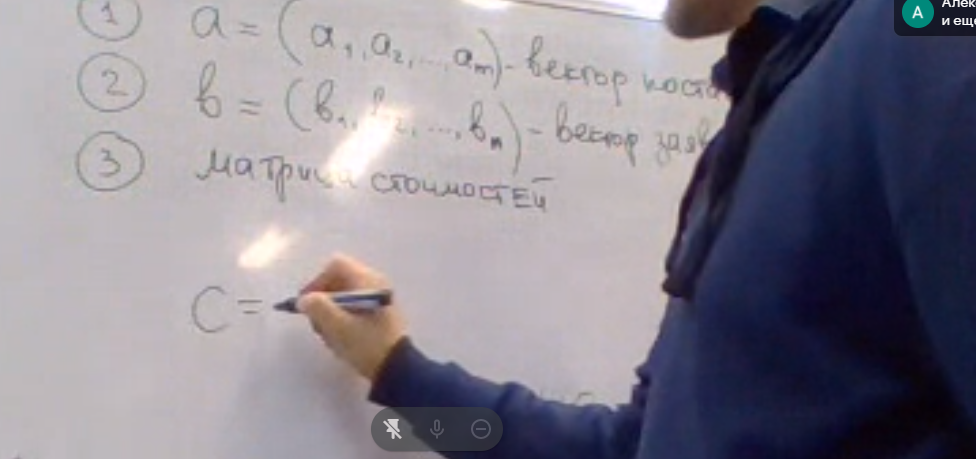

In [ ]:
A = np.array([20, 30, 50])
B = np.array([25,25,25,25])
X = np.array([[20, 0, 0, 0],[5, 25, 0, 0], [0, 0, 25, 25]])
Jb = np.array([[1, 1], [2, 1], [2, 2], [3, 2], [3, 3], [3, 4]])

In [ ]:
np.sum(A) == np.sum(B)

True

In [ ]:
import numpy as np
A = np.array([50, 50, 100]) 
B = np.array([40, 90, 70]) 
C = np.array([[2, 5, 3], 
 [4, 3, 3], 
 [5, 1, 2]]) 
 
res = solve(A, B, C) 
 
print(res)

[[0 0]
 [0 1]
 [1 1]
 [2 1]
 [2 2]]
[ 0. -2. -4.] [2. 5. 6.]
[[40.  0. 10.]
 [ 0. 50.  0.]
 [ 0. 40. 60.]]
[[0 0]
 [1 1]
 [2 1]
 [2 2]
 [0 2]]
[ 0.  1. -1.] [2. 2. 3.]
[[40.  0. 10.]
 [ 0.  0. 50.]
 [ 0. 90. 10.]]
[[0 0]
 [2 1]
 [2 2]
 [0 2]
 [1 2]]
[ 0.  0. -1.] [2. 2. 3.]
[[40.  0. 10.]
 [ 0.  0. 50.]
 [ 0. 90. 10.]]


In [ ]:
import numpy as np
A = np.array([0, 0, 0])
B = np.array([0, 0, 0])
c = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
solve(A,B,c)

[[0 0]
 [1 1]
 [2 2]]
[0. 0. 0.] [0. 0. 0.]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
def generator(n, m):
  for i in range(n):
    for j in range(m):
      yield i, j

In [ ]:
def solve(A, B, c):
  n = len(A)
  m = len(B)
  X = np.zeros((n, m))
  aa = np.copy(A)
  bb = np.copy(B)
  i, j = 0, 0
  Jb = np.empty((0, 2), int)
  while True:
    X[i][j] = min(aa[i], bb[j])
    aa[i] -= X[i][j]
    bb[j] -= X[i][j]
    Jb = np.append(Jb, np.array([[i, j]]), axis = 0)
    if aa[i] == 0:
      i += 1
    if bb[j] == 0:
      j += 1
    if i == n or j == m:
      break
  while True:
    cb = []
    for i in Jb:
      cb.append(c[i[0]][i[1]])
    print(Jb)
    u = np.zeros(n)
    v = np.zeros(m)
    ram = np.zeros((2, max(n, m)))
    eq = [[f'u{i[0]}', f'v{i[1]}'] for i in Jb]
    queue = ['u0']
    ram[0][0] = 1
    while len(queue) > 0:
      now = queue[0]
      queue.pop(0)
      k = 0 if now[0] == 'u' else 1
      index = int(now[1])
      numb = u[index] if k == 0 else v[index] 
      for i in range(len(Jb)):
        if eq[i][k] != now:
          continue
        if ram[(k + 1) % 2][int(eq[i][(k + 1) % 2][1])] == 0:
          queue.append(eq[i][(k + 1) % 2])
        ram[(k + 1) % 2][int(eq[i][(k + 1) % 2][1])] = 1
        new_numb = cb[i] - numb
        if k == 0:
          v[int(eq[i][(k + 1) % 2][1])] = new_numb
        else:
          u[int(eq[i][(k + 1) % 2][1])] = new_numb
    print(u, v)
    ri, rj = -5, -5
    for i, j in generator(n,m):
      k = np.array([i, j])
      if not any(np.equal(Jb,k).all(1)):
        if u[i]+v[j] >c[i][j]:
          ri, rj = i, j
          break
    if ri == -5 and rj == -5:
      return X
    Jb = np.append(Jb, [[ri, rj]], axis = 0)
    q = np.copy(Jb)
    while True:
      flx, fly = 1, 1
      for i in range(n):
        count = 0
        for k in q:
          if k[0] == i:
            count += 1
        if count < 2:
          j = 0
          while j < len(q):
            if q[j][0] == i:
              q = np.delete(q, j, axis = 0)
              flx = 0
            else:
              j += 1
      for i in range(n):
        count = 0
        for k in q:
          if k[1] == i:
            count += 1
        if count < 2:
          j = 0
          while j < len(q):
            if q[j][1] == i:
              q = np.delete(q, j, axis = 0)
              fly = 0
            else:
              j += 1
      if flx == 1 and fly == 1:
        break
    graph = np.full((len(q), len(q)), 0)
    for i in range(len(graph)):
      for j in range(len(graph)):
        if i == j:
          graph[i][j] = 0
          continue
        for k in range(len(graph)):
          if k == i or k == j:
            continue
          if q[i][0] == q[j][0] and q[k][1] in range(min(q[i][1], q[j][1]), max(q[j][1], q[i][1]) + 1):
            graph[i][j] = 1
          elif q[i][1] == q[j][1] and q[k][0] in range(min(q[i][0],q[j][0]), max(q[i][0], q[i][0]) + 1):
            graph[i][j] = 1
    queue = [len(q) - 1]
    pm = np.array([2 for _ in range(len(q))])
    pm[-1] = 1
    while len(queue) > 0:
      x = queue[0]
      queue.pop(0)
      for j in range(len(q)):
        if graph[x][j] == 1 and pm[j] == 2:
          queue.append(j)
          pm[j] = (pm[x] + 1) % 2
    tetta = 999 ** 999
    di, dj = 9999, 9999
    for i in range(len(q)):
      if pm[i] == 0 and X[q[i][0]][q[i][1]] < tetta:
        tetta = X[q[i][0]][q[i][1]]
        ti = q[i][0]
        tj = q[i][1]
    for i in range(len(q)):
      if pm[i] == 1:
        X[q[i][0]][q[i][1]] += tetta
      else:
        X[q[i][0]][q[i][1]] -= tetta
    for i in range(len(Jb)):
      if Jb[i][0] == ti and Jb[i][1] == tj:
        Jb = np.delete(Jb, i, 0)
        break
    print(X)

1aya faza

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
X = np.array([[100, 0, 0], [200, 100, 0], [0, 100, 200]])
Jb = np.array([[1, 1], [2, 1], [2, 2], [3, 2], [3, 3]])

In [ ]:
cb = []
for i in Jb:
  cb.append(c[i[0]][i[1]])
print(cb)

[2, 1, 2, 3, 2]


In [ ]:
u = np.zeros(n)
v = np.zeros(m)


In [ ]:
ram = np.zeros((2, max(n, m)))
eq = [[f'u{i[0]}', f'v{i[1]}'] for i in Jb]
queue = ['u0']
ram[0][0] = 1
while len(queue) > 0:
  now = queue[0]
  queue.pop(0)
  k = 0 if now[0] == 'u' else 1
  index = int(now[1])
  numb = u[index] if k == 0 else v[index] 
  for i in range(len(Jb)):
    if eq[i][k] != now:
      continue
    if ram[(k + 1) % 2][int(eq[i][(k + 1) % 2][1])] == 0:
      queue.append(eq[i][(k + 1) % 2])
    ram[(k + 1) % 2][int(eq[i][(k + 1) % 2][1])] = 1
    new_numb = cb[i] - numb
    if k == 0:
      v[int(eq[i][(k + 1) % 2][1])] = new_numb
    else:
      u[int(eq[i][(k + 1) % 2][1])] = new_numb
print(u, v)
    
    

    
    
    



[ 0. -1. -1.] [2. 2. 3.]


написать солвер

In [ ]:
u = np.array([0, 0, 3])
v = np.array([8, 4, 2])


In [ ]:
def generator(n, m):
  for i in range(n):
    for j in range(m):
      yield i, j

In [ ]:
ri, rj = -5, -5
for i, j in generator(n,m):
  k = np.array([i, j])
  if not any(np.equal(Jb,k).all(1)):
    if u[i]+v[j] >c[i][j]:
      ri, rj = i, j
      break
print(ri, rj)

-5 -5


In [ ]:
Jb = np.append(Jb, [[ri, rj]], axis = 0)
print(Jb)

[[0 0]
 [1 1]
 [2 1]
 [2 2]
 [0 2]
 [1 2]]


In [ ]:
q = np.copy(Jb)

while True:
  flx, fly = 1, 1
  
  for i in range(n):
    count = 0
    for k in q:
      
      if k[0] == i:
        
        count += 1
    
    if count < 2:
     j = 0
     while j < len(q):
       
       if q[j][0] == i:
         
         q = np.delete(q, j, axis = 0)
         flx = 0
       else:
         j += 1
  for i in range(n):
    count = 0
    for k in q:
      if k[1] == i:
        count += 1
    if count < 2:
     j = 0
     while j < len(q):
       if q[j][1] == i:
         q = np.delete(q, j, axis = 0)
         fly = 0
       else:
         j += 1
  if flx == 1 and fly == 1:
    break
print(q)
      


[[1 1]
 [2 1]
 [2 2]
 [1 2]]


In [ ]:
graph = np.full((len(q), len(q)), 0)
for i in range(len(graph)):
  for j in range(len(graph)):
    if i == j:
      graph[i][j] = 0
      continue
    for k in range(len(graph)):
      if k == i or k == j:
        continue
      if q[i][0] == q[j][0] and q[k][1] in range(min(q[i][1], q[j][1]), max(q[j][1], q[i][1]) + 1):
        graph[i][j] = 1
      elif q[i][1] == q[j][1] and q[k][0] in range(min(q[i][0],q[j][0]), max(q[i][0], q[i][0]) + 1):
        graph[i][j] = 1
      
print(graph)
      

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


In [ ]:
queue = [len(q) - 1]
pm = np.array([2 for _ in range(len(q))])
pm[-1] = 1
while len(queue) > 0:
  x = queue[0]
  queue.pop(0)
  for j in range(len(q)):
    if graph[x][j] == 1 and pm[j] == 2:
      queue.append(j)
      pm[j] = (pm[x] + 1) % 2
print(pm)

[0 1 0 1]


In [ ]:
tetta = 999 ** 999
di, dj = 9999, 9999
for i in range(len(q)):
  if pm[i] == 0 and X[q[i][0]][q[i][1]] < tetta:
    tetta = X[q[i][0]][q[i][1]]
    ti = q[i][0]
    tj = q[i][1]
print(tetta, ti, tj)

50.0 1 1


In [ ]:
print(X)
for i in range(len(q)):
  if pm[i] == 1:
    X[q[i][0]][q[i][1]] += tetta
  else:
    X[q[i][0]][q[i][1]] -= tetta
print(X)

[[40.  0. 10.]
 [ 0. 50.  0.]
 [ 0. 40. 60.]]
[[40.  0. 10.]
 [ 0.  0. 50.]
 [ 0. 90. 10.]]


In [ ]:
for i in range(len(Jb)):
  if Jb[i][0] == ti and Jb[i][1] == tj:
    Jb = np.delete(Jb, i, 0)
    break
print(Jb)


[[0 0]
 [2 1]
 [2 2]
 [0 2]
 [1 2]]


In [ ]:
n = len(A)
m = len(B)
X = np.zeros((n, m))
aa = np.copy(A)
bb = np.copy(B)
i, j = 0, 0
Jb = np.empty((0, 2), int)
while True:
  X[i][j] = min(aa[i], bb[j])
  aa[i] -= X[i][j]
  bb[j] -= X[i][j]
  Jb = np.append(Jb, np.array([[i, j]]), axis = 0)
  if aa[i] == 0:
      i += 1
  if bb[j] == 0:
      j += 1
  if i == n or j == m:
    break
print(X, Jb)

[[40. 10.  0.]
 [ 0. 50.  0.]
 [ 0. 30. 70.]] [[0 0]
 [0 1]
 [1 1]
 [2 1]
 [2 2]]


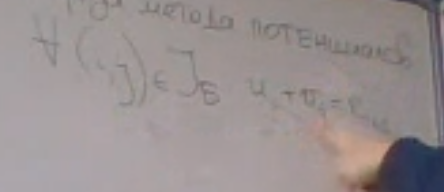

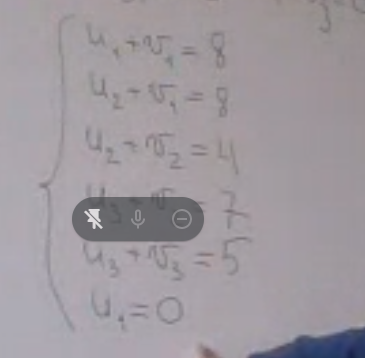